# 1. Data Understanding

In [2]:
# importing necessary libraries for data loading and EDA
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the train data
df_train = pd.read_csv(r'/home/ducanh/Credit Card Transactions Fraud Detection/Datasets/fraudTrain.csv')

# check
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# check the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
# check if there are any duplicates in the 'trans_num' column
df_train['trans_num'].duplicated().sum()

np.int64(0)

There are no duplicates in transaction number column

In [6]:
# how many card holders are there
len(df_train['cc_num'].unique())

983

There are 983 cardholders in the train data.

In [7]:
# defining a function that performs the basic data cleaning operations
def data_clean_1(df):
    df = df.iloc[:,1:]
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    return df
                                                 
# applying the function on our train dataframe
df_train = data_clean_1(df_train)
    
# check
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
# check 2
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [ ]:
# let's do the same operation for test data as well
df_test = pd.read_csv(r'/home/ducanh/Credit Card Transactions Fraud Detection/Datasets/fraudTest.csv')

# check
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
# info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [11]:
# applying the function on our train dataframe
df_test = data_clean_1(df_test)

# check
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [12]:
# let's concat both the train and test dataframes into one dataframe
df = pd.concat([df_train, df_test])

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              int64

In [13]:
# cross check
df['trans_num'].duplicated().sum()

np.int64(0)

In [14]:
if len(df) == len(df['trans_num'].unique()):
    print('The data is at transaction level')
else:
    print('The data is not at transaction level')

The data is at transaction level


In [15]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [16]:
# how many card holders are there in the data
len(df['cc_num'].unique())

999

In [17]:
# how many merchants are there
len(df['merchant'].unique())

693

#### Card holders = 999, Merchants = 693

In [18]:
# resetting index
df.reset_index(inplace=True)

In [19]:
# resetting the index
df.drop('index',axis = 1,inplace = True)

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

#### Average number of transactions per month

In [20]:
# deriving a unique month column w.r.t each year
df['trans_year_month'] = df['trans_date_trans_time'].apply(lambda x: str(x)[:7])

# check
df[['trans_date_trans_time','trans_year_month']]

,trans_date_trans_time,trans_year_month
0,2019-01-01 00:00:18,2019-01
1,2019-01-01 00:00:44,2019-01
2,2019-01-01 00:00:51,2019-01
3,2019-01-01 00:01:16,2019-01
4,2019-01-01 00:03:06,2019-01
...,...,...
1852389,2020-12-31 23:59:07,2020-12
1852390,2020-12-31 23:59:09,2020-12
1852391,2020-12-31 23:59:15,2020-12
1852392,2020-12-31 23:59:24,2020-12


In [21]:
# how many months of data is available
len(df['trans_year_month'].unique())

24

In [22]:
# avg number of transactions per month is computed as
avg_nbr_of_txns = len(df['trans_num'].unique())/len(df['trans_year_month'].unique())
print('Average number of transactions per month = ',round(avg_nbr_of_txns))

Average number of transactions per month =  77183


#### Average number of fradulent transactions per month

In [23]:
# number of fradulent transactions
print('The total number of Fraudulent transactions in the given 2 years period are',len(df[df['is_fraud'] == 1]['trans_num'].unique()))

The total number of Fraudulent transactions in the given 2 years period are 9651


In [24]:
# avg number of fradulent transactions per month
print('Average number of fraudulent transactions per month = ', round(len(df[df['is_fraud'] == 1]['trans_num'].unique())/len(df[df['is_fraud'] == 1]['trans_year_month'].unique())))

Average number of fraudulent transactions per month =  402


In [25]:
# Total value of fraudulent transactions in the given period of 2 years
'$'+str(np.sum(df[df['is_fraud'] == 1]['amt']))

'$5121413.290000001'

In [26]:
len(df[df['is_fraud'] == 1]['trans_num'].unique())

9651

It costed around $ 5 million to the bank.

In [27]:
# Avg amount per fraud transaction is computed as
# total fraudulent transaction amount divided by the total number of fraudulent transactions
print('Average amount per fraud transaction = ${}'.format(round(np.sum(df[df['is_fraud'] == 1]['amt'])/len(df[df['is_fraud'] == 1]['trans_num'].unique()),2)))

Average amount per fraud transaction = $530.66


In [28]:
## cost incurred per month to the bank due to the fraudulent transactions 
round(402*530.66,2)

213325.32

# 2. Exploratory Data Analyses (EDA)

In [29]:
# check info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [30]:
# checking the transaction amount column w.r.t fraudulent transactions
df[df['is_fraud'] == 1]['amt'].describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

<Figure size 1500x300 with 0 Axes>

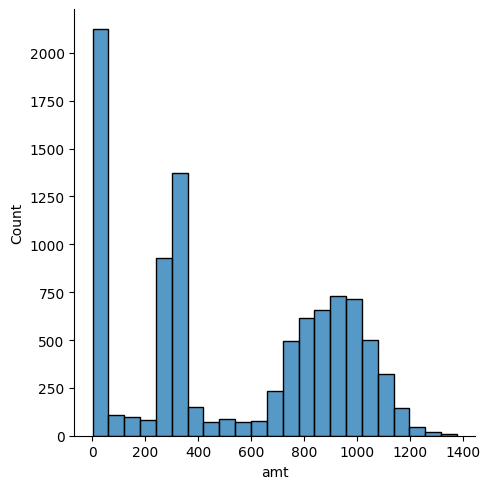

In [31]:
plt.figure(figsize = (15,3))
sns.displot(df[df['is_fraud'] == 1]['amt'])

### Analyses w.r.t. customer demographic information

In [32]:
# deriving age column.
# since this data is till 2020 Dec 31, We will compute age of each customer during 2021.
df['cust_age'] = df['dob'].dt.year.apply(lambda x: 2021-x)

# check
df['cust_age']

0          33
1          43
2          59
3          54
4          35
           ..
1852389    55
1852390    22
1852391    40
1852392    56
1852393    28
Name: cust_age, Length: 1852394, dtype: int64

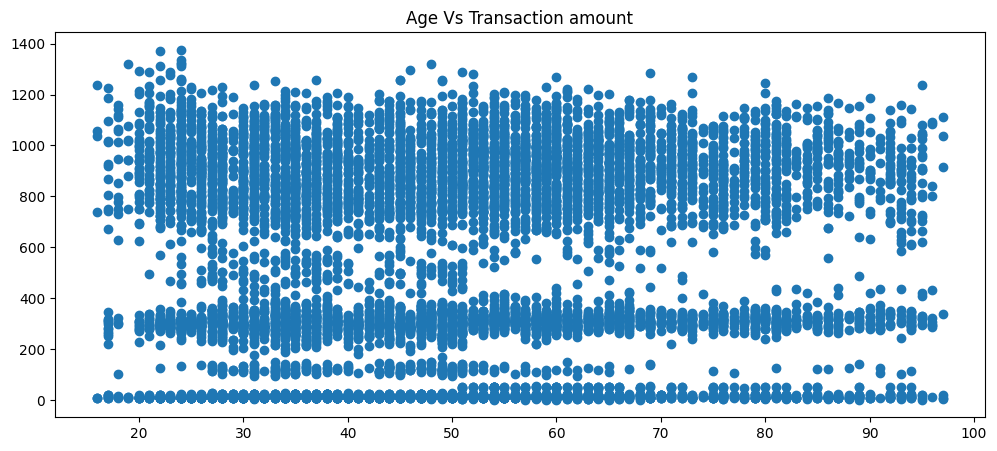

In [33]:
# visualize Age Vs fraudulent transaction amounts
plt.figure(figsize = (12,5))
plt.title('Age Vs Transaction amount')
plt.scatter(df[df['is_fraud'] == 1]['cust_age'],df[df['is_fraud'] == 1]['amt'])
plt.show()

`Inferences:` There's no specific pattern, let's bucket the age column and see the trend towards transaction amount.

In [34]:
# let's bucket the age column
df['cust_age_groups'] = df['cust_age'].apply(lambda x: 'below 10' if x<10 else ('10-20' if x>=10 and x<20 else ('20-30' if x>=20 and x<30 else('30-40' if x>=30 and x<40 else('40-50' if x>=40 and x<50 else('50-60' if x>=50 and x<60 else('60-70' if x>=60 and x<70 else ('70-80' if x>=70 and x<80 else 'Above 80'))))))))

# check
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year_month,cust_age,cust_age_groups
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01,33,30-40
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01,43,40-50
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01,59,50-60
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01,54,50-60
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01,35,30-40


In [35]:
# now let's see which customer age group was more prone towards the number of fraudulent transactions
age_piv = pd.pivot_table(data = df,
                         index = 'cust_age_groups',
                         columns = 'is_fraud',
                         values = 'trans_num',
                         aggfunc = 'count')

# check
age_piv

is_fraud,0,1
cust_age_groups,,
10-20,19662,72
20-30,240278,1299
30-40,431724,1870
40-50,419342,1642
50-60,294902,1832
60-70,211150,1373
70-80,115033,714
Above 80,110652,849


<Axes: title={'center': 'Age group vulnerability'}, xlabel='Age groups', ylabel='No. of transactions'>

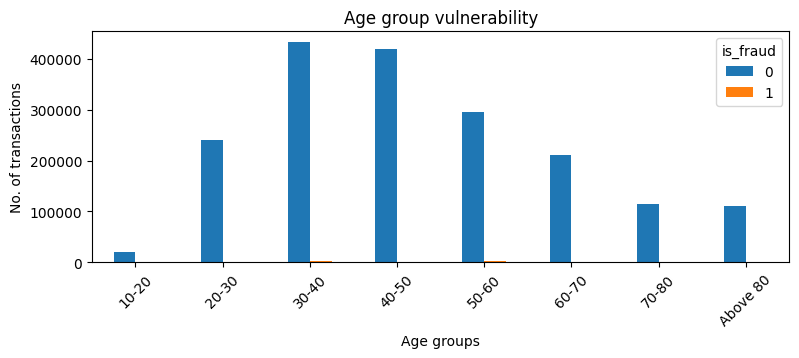

In [36]:
age_piv.plot(kind = 'bar', title = 'Age group vulnerability', xlabel = 'Age groups',ylabel = 'No. of transactions',figsize = (9,3),rot = 45 )

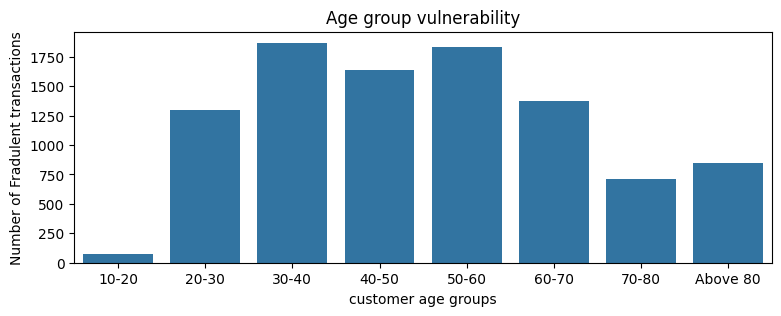

In [37]:
# let's see only fraudlent transactions 
plt.figure(figsize = (9,3))
plt.title('Age group vulnerability')
sns.barplot(data = age_piv, x = age_piv.index, y = age_piv[1].values )
plt.xlabel('customer age groups')
plt.ylabel('Number of Fradulent transactions')
plt.show()

`Inferences:`
Customers who are in the 30-40 age group are more vulnerable to the number of fradulent transactions.

Let's find how much it costed for the bank on an average for each age group in the case of fradulent transactions.

In [ ]:
age_piv_2 = pd.pivot_table(data = df,
                           index = 'cust_age_groups',
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
age_piv_2

is_fraud,0,1
cust_age_groups,,
10-20,62.804052,570.907083
20-30,65.090333,547.980169
30-40,71.807532,501.161610
40-50,72.071064,458.982582
50-60,65.087352,551.289754
60-70,62.254365,571.760291
70-80,62.767527,581.812213
Above 80,63.316478,550.361013


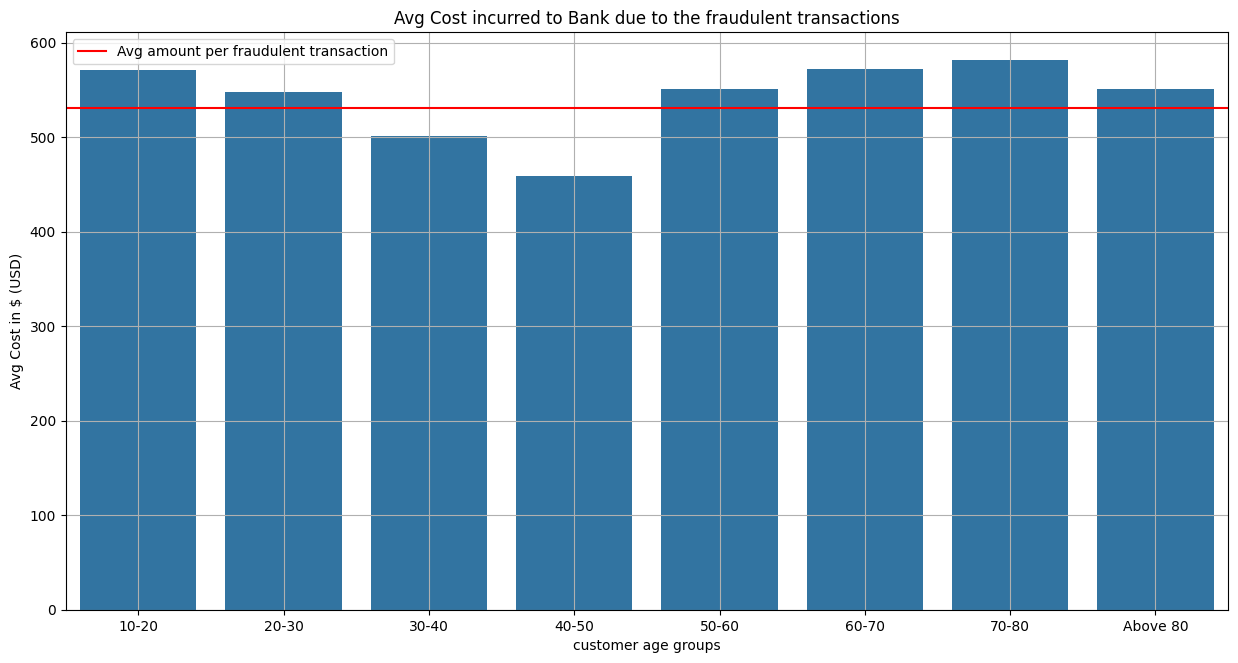

In [39]:
# let's visualize only the fraudlent transactions 
plt.figure(figsize = (15,7.5))
plt.title('Avg Cost incurred to Bank due to the fraudulent transactions')
sns.barplot(data = age_piv_2, x = age_piv_2.index, y = age_piv_2[1].values)
plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
plt.grid()
plt.xlabel('customer age groups')
plt.ylabel('Avg Cost in $ (USD)')
plt.legend()
plt.show()

`Inferences:` 
Avg cost incurred is greater than the overall average transaction amount per fraudulent transaction, for the customers belonging to the age groups `10-30` and `>=50`

In [40]:
# deep dive into gender
age_gen_piv = pd.pivot_table(data = df,
                           index = ['cust_age_groups','gender'],
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
age_gen_piv

is_fraud                        0           1
cust_age_groups gender                       
10-20           F       62.810493  462.360000
                M       62.798893  657.744750
20-30           F       66.296307  507.903902
                M       63.808292  599.881060
30-40           F       71.160408  416.308351
                M       72.772864  584.753779
40-50           F       71.632860  360.021517
                M       72.614785  553.928520
50-60           F       66.886574  522.047746
                M       63.224855  573.657919
60-70           F       61.881839  573.675787
                M       62.653632  569.371408
70-80           F       62.008964  578.499973
                M       63.565175  585.256943
Above 80        F       63.620022  576.027386
                M       62.824387  516.652044

`Inferences:` Banks average compensation is high for the males belonging to age group `10-20` which is $657.74. Except `60-70` and `Above 80` in all the other age groups, males are dominating more in terms of average compensation received compared to their female counterparts.

#### Analysis w.r.t. Customers Job categories 

In [41]:
# see all the customer job categories in the data
df['job'].value_counts()

job
Film/video editor                 13898
Exhibition designer               13167
Surveyor, land/geomatics          12436
Naval architect                   12434
Materials engineer                11711
                                  ...  
Engineer, water                       8
Armed forces technical officer        8
Ship broker                           7
Warehouse manager                     7
Contracting civil engineer            7
Name: count, Length: 497, dtype: int64

Is there any relationship between Customer's professional information and the fraudulent transactions?

In [42]:
job_txn_piv = pd.pivot_table(data = df,
                         index = 'job',
                         columns = 'is_fraud',
                         values = 'trans_num',
                         aggfunc = 'count')


job_txn_piv.sort_values(by = 1, ascending = False, inplace = True)

In [43]:
# check the top 10 job categories of the customers which are more vulnerable towards fradulent transactions
job_txn_piv[:10]

is_fraud,0,1
job,,
Quantity surveyor,8011.0,69.0
Naval architect,12368.0,66.0
Materials engineer,11649.0,62.0
Audiological scientist,8743.0,58.0
Senior tax professional/tax inspector,5820.0,57.0
Trading standards officer,6555.0,56.0
Podiatrist,9471.0,54.0
Film/video editor,13846.0,52.0
Exhibition designer,13116.0,51.0


In [44]:
# avg cost incurred to bank due to fraudulent transactions w.r.t. each customer job category
job_txn_piv_2 = pd.pivot_table(data = df,
                               index = 'job',
                               columns = 'is_fraud',
                               values= 'amt',
                               aggfunc = np.mean)

# check
job_txn_piv_2

is_fraud,0,1
job,,
Academic librarian,59.978709,640.192727
"Accountant, chartered",NaN,485.706364
"Accountant, chartered certified",64.498041,669.404762
"Accountant, chartered public finance",54.398289,521.846667
Accounting technician,73.695373,605.632727
...,...,...
Water engineer,70.660723,283.579231
Water quality scientist,63.824663,685.065714
Web designer,57.169168,632.483889


In [45]:
# visualizing the top 10 job categories from high avg cost
job_txn_piv_2.sort_values(by = 1, ascending = False, inplace = True)

# check
job_txn_piv_2[:10]

is_fraud,0,1
job,,
Health promotion specialist,65.084065,920.257778
Ship broker,NaN,874.505714
Community education officer,59.453640,869.980000
Clinical psychologist,49.461961,864.783750
Hydrologist,69.746725,818.023889
Commissioning editor,64.621841,804.376667
Medical physicist,61.950005,801.131429
Hospital pharmacist,61.867750,776.057500
Plant breeder/geneticist,77.992390,773.039000


`Inferences:`Average cost incurred is highest for those customers who are Health promotion specialists. It is $920.25

#### Top states having high average cost incurred to bank

In [46]:
state_piv = pd.pivot_table(data = df,
                           index = 'state',
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)
# check
state_piv

is_fraud,0,1
state,,
AK,61.955064,604.397800
AL,62.867098,536.228417
AR,73.682327,501.256564
AZ,73.458862,507.085156
CA,71.178889,512.286020
CO,75.201913,516.973652
CT,61.771970,513.672321
DC,72.488092,525.161290
DE,NaN,514.493333


`Inferences:` Average cost per month incurred to bank is highest for those customers who belong to `Rhode Island` state, which is $732.98.

#### How city population varies w.r.t. the Fraudulent transaction amount ?

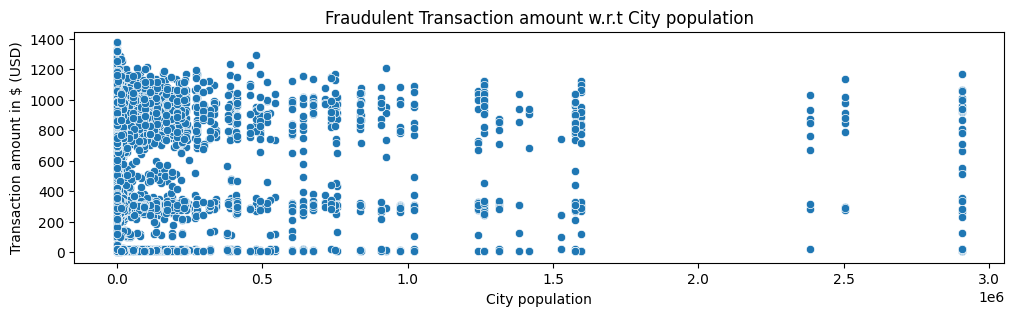

In [47]:
plt.figure(figsize = (12,3))
plt.title('Fraudulent Transaction amount w.r.t City population')
sns.scatterplot(data = df[df['is_fraud'] == 1], x = df[df['is_fraud'] == 1]['city_pop'], y = df[df['is_fraud'] == 1]['amt'])
plt.xlabel('City population')
plt.ylabel('Transaction amount in $ (USD)')
plt.show()

`Inferences:` There's no specific pattern observed.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

#### Top cities which are having high avg cost incurred to bank

In [49]:
# deriving a column containing city and its respective state
df['city-state'] = df['city']+'-'+df['state']

# check
df['city-state']

0          Moravian Falls-NC
1                  Orient-WA
2              Malad City-ID
3                 Boulder-MT
4                Doe Hill-VA
                 ...        
1852389             Luray-MO
1852390      Lake Jackson-TX
1852391           Burbank-WA
1852392              Mesa-ID
1852393            Edmond-OK
Name: city-state, Length: 1852394, dtype: object

In [50]:
# pivoting
city_piv = pd.pivot_table(data = df,
                          index = 'city-state',
                          columns = 'is_fraud',
                          values = 'amt',
                          aggfunc = np.mean)

# check
city_piv

is_fraud,0,1
city-state,,
Achille-OK,50.401444,411.865385
Acworth-NH,93.952545,709.354615
Adams-WI,59.655901,676.559167
Afton-MI,62.704056,565.707143
Afton-MN,72.495744,445.716667
...,...,...
Woods Cross-UT,94.437603,NaN
Woodville-AL,51.893661,219.465000
Yellowstone National Park-WY,58.350726,648.406667


In [51]:
# orderding the cost incurred due to fraudulent transactions in descending order
city_piv.sort_values(by = 1, ascending = False, inplace = True)

# check the top 10 cities
city_piv[:10]

is_fraud,0,1
city-state,,
De Lancey-NY,66.360867,926.156667
Monmouth Beach-NJ,65.084065,920.257778
North East-PA,NaN,918.425556
Arcadia-MI,59.333280,899.408571
Schaefferstown-PA,93.592899,897.211111
Thida-AR,71.254839,888.572500
Harrodsburg-IN,58.898636,884.250000
Oakford-IL,63.514107,878.527500
Karns City-PA,NaN,874.505714


`Inferences:` 
- Average cost per month incurred to bank is highest for those customers who belong to `De Lancey` city in `Newyork` state, which is `$926.15`.
- Cities North East and Karns City, both belonging to Pennsylvania state have recorded only the Fraudulent transactions.  

#### Top merchant categories which are targeted while performing fraudulent transactions in terms of average transaction amount.

In [52]:
# df[df['is_fraud'] == 1].groupby('category')['amt'].mean().sort_values(ascending = False)
merch_piv = pd.pivot_table(data = df,
                           index = df['category'],
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
merch_piv

is_fraud,0,1
category,,
entertainment,63.181494,504.794384
food_dining,50.884652,120.678829
gas_transport,63.688542,12.231256
grocery_net,53.801150,12.046914
grocery_pos,114.135071,312.237262
health_fitness,54.139079,20.277622
home,57.886732,257.479094
kids_pets,57.601378,18.485296
misc_net,70.689738,798.654577


In [53]:
# Merchant categories which costed greater than or equal to the average fraudulent transaction cost
merch_piv[merch_piv[1]>=530.66]

is_fraud,0,1
category,,
misc_net,70.689738,798.654577
shopping_net,72.194496,998.128725
shopping_pos,73.799294,878.913201


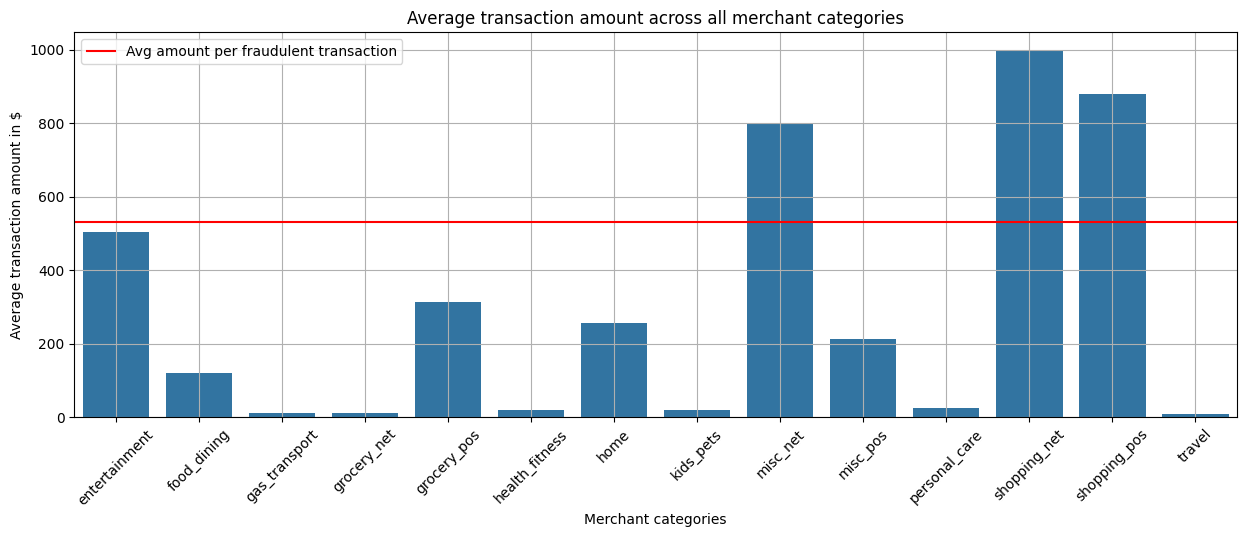

In [54]:
plt.figure(figsize = (15,5))
plt.title("Average transaction amount across all merchant categories")
sns.barplot(data = merch_piv,
            x = merch_piv.index,
            y = merch_piv[1])
plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
plt.xticks(rotation = 45)
plt.xlabel('Merchant categories')
plt.ylabel('Average transaction amount in $')
plt.legend()
plt.grid()
plt.show()

`Inferences:` High value fraudulent transactions happened for the merchant category `shopping_net` which means online shopping.

#### How is the geographical distance between customer location to merchant location varies with respect to the fradulent transaction amount

In [55]:
# function to determine distance between two coordinates
# link to this function: - https://www.geeksforgeeks.org/program-distance-two-points-earth/
from math import radians, cos, sin, asin, sqrt
def distance(df, lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    df['lon1'] = df[lon1].apply(lambda x: radians(x))
    df['lon2'] = df[lon2].apply(lambda x: radians(x))
    df['lat1'] = df[lat1].apply(lambda x: radians(x))
    df['lat2'] = df[lat2].apply(lambda x: radians(x))
      
    # Haversine formula
    df['dlon'] = df['lon2'] - df['lon1']
    df['dlat'] = df['lat2'] - df['lat1']

    df['a'] = df['dlat'].apply(lambda x: sin(x/2)**2) + df['lat1'].apply(lambda x: cos(x))*df['lat2'].apply(lambda x: cos(x))*df['dlon'].apply(lambda x: sin(x/2)**2)
 

    df['c'] = df['a'].apply(lambda x: 2*asin(sqrt(x)))
    
    # Radius of earth in kilometers = 6371. Use 3956 for miles
    r = 3956
      
    # calculate the result
    return(df['c'] * r)

In [56]:
df['distance_bw_cust_merch_in_miles'] = distance(df,lat1 = 'lat', lat2 = 'merch_lat', lon1 = 'long', lon2 = 'merch_long')

# check
df['distance_bw_cust_merch_in_miles']

0          48.804266
1          18.759907
2          67.189336
3          59.407205
4          48.157978
             ...    
1852389    47.828510
1852390    62.140073
1852391    50.146570
1852392    32.868294
1852393    44.979732
Name: distance_bw_cust_merch_in_miles, Length: 1852394, dtype: float64

In [57]:
# check 2
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city-state,lon1,lon2,lat1,lat2,dlon,dlat,a,c,distance_bw_cust_merch_in_miles
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,Moravian Falls-NC,-1.416825,-1.432013,0.629694,0.628516,-0.015188,-0.001178,0.000038,0.012337,48.804266
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Orient-WA,-2.063162,-2.062743,0.853253,0.857987,0.000420,0.004734,0.000006,0.004742,18.759907
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Malad City-ID,-1.959342,-1.957465,0.736194,0.753122,0.001877,0.016928,0.000072,0.016984,67.189336
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Boulder-MT,-1.956755,-1.964561,0.806876,0.820904,-0.007806,0.014028,0.000056,0.015017,59.407205
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Doe Hill-VA,-1.386889,-1.372395,0.670568,0.675006,0.014494,0.004438,0.000037,0.012173,48.157978


In [58]:
# let's bucket the distance between customer and merchant
df['distance_cust_merch'] = df['distance_bw_cust_merch_in_miles'].apply(lambda x: '< 20' if x>0 and x<=20 else('20-40' if x>20 and x<=40 else('40-60' if x>40 and x<=60 else('60-80' if x>60 and x<=80 else '> 80'))))

# check
df[['distance_bw_cust_merch_in_miles','distance_cust_merch']]

,distance_bw_cust_merch_in_miles,distance_cust_merch
0,48.804266,40-60
1,18.759907,< 20
2,67.189336,60-80
3,59.407205,40-60
4,48.157978,40-60
...,...,...
1852389,47.828510,40-60
1852390,62.140073,60-80
1852391,50.146570,40-60
1852392,32.868294,20-40


In [59]:
# let's see how w.r.t distance transaction amount varies
dis_piv = pd.pivot_table(data = df,
                         index = 'distance_cust_merch',
                         columns = 'is_fraud',
                         values = 'amt',
                         aggfunc = np.mean)

# check
dis_piv

is_fraud,0,1
distance_cust_merch,,
20-40,67.980100,518.545797
40-60,67.466160,536.074159
60-80,67.490977,529.616239
< 20,67.798937,544.268404
> 80,68.601749,540.452455


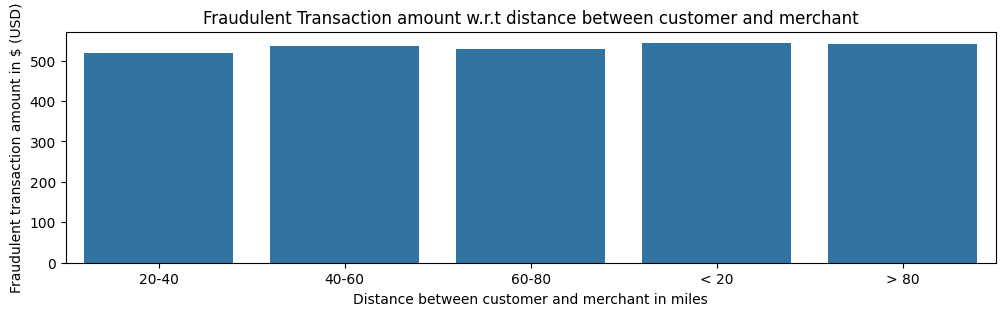

In [60]:
# now let's see how fraudulent transaction amount varies w.r.t. the distance between customer and merchant location
plt.figure(figsize = (12,3))
plt.title('Fraudulent Transaction amount w.r.t distance between customer and merchant')
sns.barplot(data = dis_piv, x = dis_piv.index, y = dis_piv[1])
plt.xlabel('Distance between customer and merchant in miles')
plt.ylabel('Fraudulent transaction amount in $ (USD)')
plt.show()

`Inferences:` High average cost incurred to bank is from those customers who are just less than 20 miles away from their merchants. But still we are unable to identify the specific pattern w.r.t distance.

#### How an average transaction amount varies w.r.t each month

In [61]:
time_series_piv = pd.pivot_table(data = df,
                                 index = 'trans_year_month',
                                 columns = 'is_fraud',
                                 values = 'amt',
                                 aggfunc = np.mean)

# check
time_series_piv

is_fraud,0,1
trans_year_month,,
2019-01,67.244077,517.352530
2019-02,67.490955,530.079458
2019-03,67.999841,481.047753
2019-04,67.345681,537.413005
2019-05,67.250211,516.051740
2019-06,68.349000,503.402825
2019-07,67.876023,570.095438
2019-08,67.182560,533.903482
2019-09,67.377040,520.754474


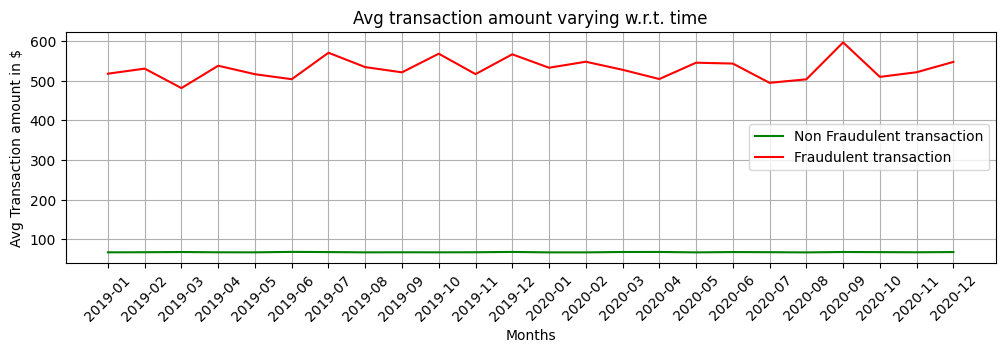

In [62]:
# let's visualize this
plt.figure(figsize = (12,3))
plt.title('Avg transaction amount varying w.r.t. time')
plt.plot(time_series_piv.index, time_series_piv[0], color = 'green', label = 'Non Fraudulent transaction')
plt.plot(time_series_piv.index, time_series_piv[1], color = 'red', label = 'Fraudulent transaction')
plt.grid()
plt.xlabel('Months')
plt.ylabel('Avg Transaction amount in $')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

`Inferences:` It is irregular and there's no pattern w.r.t. time

In [63]:
#let's check the frequency of fraudulent transactions w.r.t month and year
time_series_piv2 = pd.pivot_table(data = df[df['is_fraud'] == 1],
                                 index = 'trans_year_month',
                                 columns = 'is_fraud',
                                 values = 'trans_num',
                                 aggfunc = 'count')

# check
time_series_piv2

is_fraud,1
trans_year_month,
2019-01,506
2019-02,517
2019-03,494
2019-04,376
2019-05,408
2019-06,354
2019-07,331
2019-08,382
2019-09,418


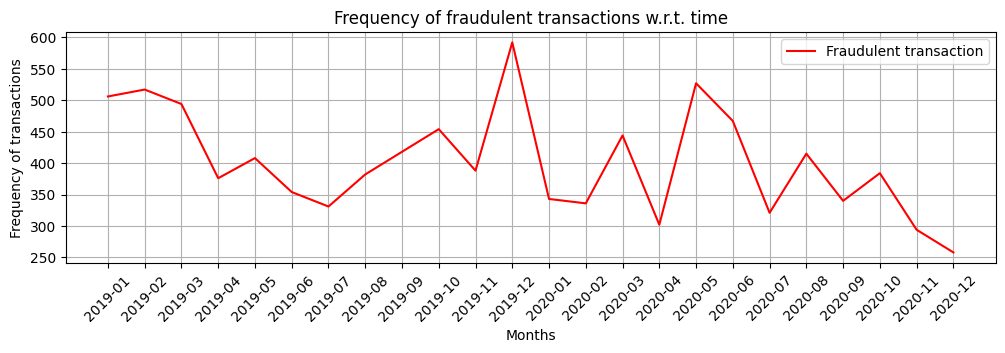

In [64]:
# let's visualize this
plt.figure(figsize = (12,3))
plt.title('Frequency of fraudulent transactions w.r.t. time')
plt.plot(time_series_piv2.index, time_series_piv2[1], color = 'red', label = 'Fraudulent transaction')
plt.grid()
plt.xlabel('Months')
plt.ylabel('Frequency of transactions')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

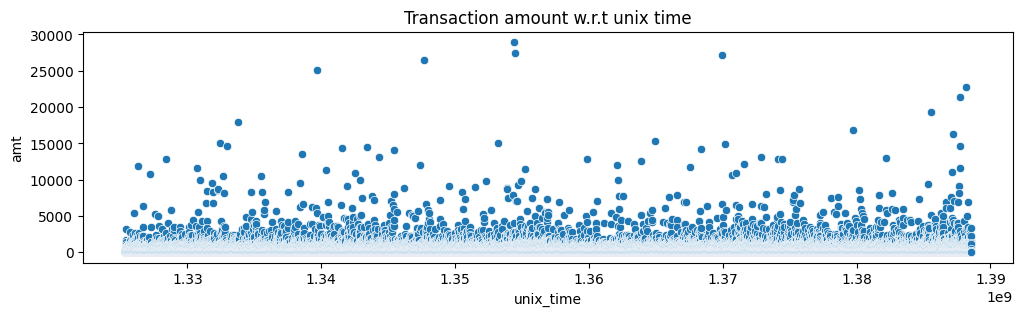

In [65]:
# how transaction amount varies w.r.t unix time
plt.figure(figsize = (12,3))
plt.title('Transaction amount w.r.t unix time')
sns.scatterplot(data = df, x = df['unix_time'],y = df['amt'])
plt.show()

`Inferences:` There's no specific pattern w.r.t. the unix time.

In [66]:
# deriving hours from the transaction date time column
df['trans_hour'] = df['trans_date_trans_time'].dt.time.apply(lambda x: str(x)[:2])

# check
df['trans_hour']

0          00
1          00
2          00
3          00
4          00
           ..
1852389    23
1852390    23
1852391    23
1852392    23
1852393    23
Name: trans_hour, Length: 1852394, dtype: object

#### Let's figure out usually at what hour of the time, the frequency of fradulent transactions is high

In [67]:
time_piv = pd.pivot_table(data = df,
                          index = 'trans_hour',
                          columns = ['is_fraud'],
                          values = 'trans_num',
                          aggfunc = 'count')

# check
time_piv

is_fraud,0,1
trans_hour,,
00,59832,823
01,60503,827
02,60003,793
03,60165,803
04,59877,61
05,60008,80
06,60352,54
07,60229,72
08,60439,59


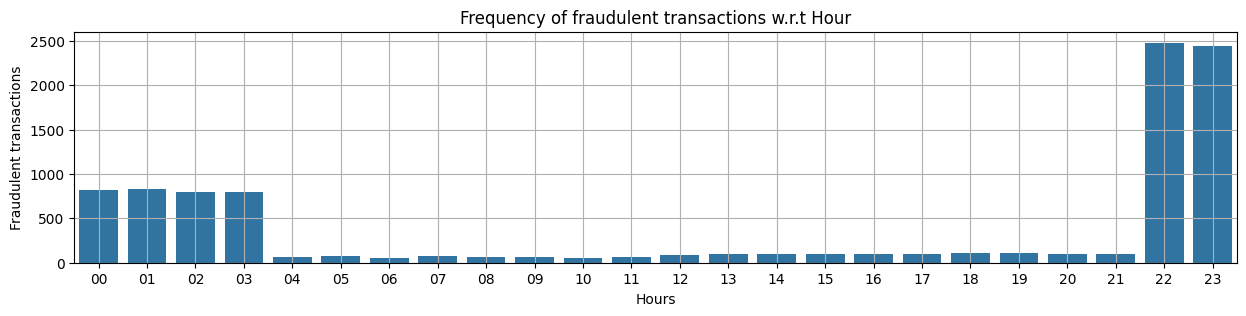

In [68]:
 # let's visualize
plt.figure(figsize = (15,3))
plt.title('Frequency of fraudulent transactions w.r.t Hour')
sns.barplot(data = time_piv, x = time_piv.index, y = time_piv[1])
plt.xlabel('Hours')
plt.ylabel('Fraudulent transactions')
plt.grid()
plt.show()

`Inferences:` In the two years span, high number of transactions happened during night time, i.e., from 10 PM to 3 AM.

#### Let's figure out at what hour of the time, average cost incurred to bank is high

In [69]:
time_piv_amt = pd.pivot_table(data = df,
                              index = 'trans_hour',
                              columns = ['is_fraud'],
                              values = 'amt',
                              aggfunc = np.mean)

# check
time_piv_amt

is_fraud,0,1
trans_hour,,
00,74.881872,344.455808
01,75.574026,358.350387
02,76.118122,360.258689
03,75.577875,353.571245
04,75.716290,312.402131
05,75.598080,310.636125
06,75.660059,323.170000
07,75.632552,369.261111
08,75.895848,333.571017


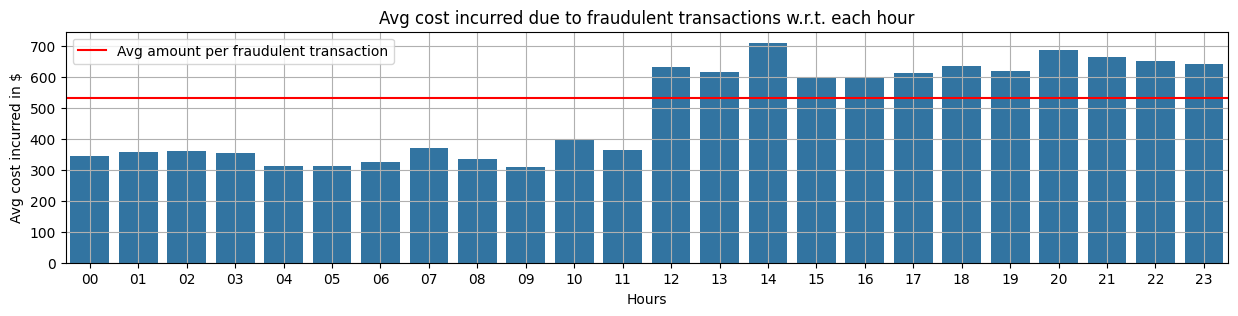

In [70]:
 # let's visualize
plt.figure(figsize = (15,3))
plt.title('Avg cost incurred due to fraudulent transactions w.r.t. each hour')
sns.barplot(data = time_piv_amt, x = time_piv_amt.index, y = time_piv_amt[1])
plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Avg cost incurred in $')
plt.legend()
plt.show()

`Inferences:` Average cost incurred to bank is highest during 2 PM, i.e., $ 709.07. 

It is in the range between $(600-750) from 12 PM to 11 PM.

In [71]:
merch_txn_hr_piv = pd.pivot_table(data = df,
                                  index = ['trans_hour','category'],
                                  columns = 'is_fraud',
                                  values = 'amt',
                                  aggfunc = np.mean)

# check
merch_txn_hr_piv

is_fraud                           0            1
trans_hour category                              
00         entertainment   46.105105   477.166000
           food_dining     79.750508   118.308000
           gas_transport   63.694597    12.454525
           grocery_net     53.421556    11.711579
           grocery_pos    114.587439   308.940433
...                              ...          ...
23         misc_pos        67.834111    21.956857
           personal_care   48.172712    25.746228
           shopping_net    73.792733  1001.199531
           shopping_pos    80.621180   882.603636
           travel         112.229316     8.476167

[252 rows x 2 columns]

Save this file to disk and visualize it in Power BI.

In [72]:
#merch_txn_hr_piv.to_csv('merchant_txn_hours.csv', index = True)

### For model building, let's remove all the redundant columns from the dataframe

In [73]:
# all Columns
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_year_month', 'cust_age',
       'cust_age_groups', 'city-state', 'lon1', 'lon2', 'lat1', 'lat2', 'dlon',
       'dlat', 'a', 'c', 'distance_bw_cust_merch_in_miles',
       'distance_cust_merch', 'trans_hour'],
      dtype='object')

In [74]:
# columns to be dropped, except trans_num, which we will be dealing further
drop_col = ['trans_date_trans_time', 'cc_num', 'merchant','first', 'last', 'street', 'city', 'state', 'lat',
       'long','dob', 'unix_time', 'merch_lat',
       'merch_long', 'trans_year_month', 'cust_age','city_pop',
       'city-state', 'lon1', 'lon2', 'lat1', 'lat2', 'dlon',
       'dlat', 'a', 'c', 'distance_bw_cust_merch_in_miles',
       'distance_cust_merch']

# dropping above columns from the dataframe
df.drop(drop_col, axis = 1, inplace = True)

# check
df.head()

,category,amt,gender,zip,job,trans_num,is_fraud,cust_age_groups,trans_hour
0,misc_net,4.97,F,28654,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0,30-40,00
1,grocery_pos,107.23,F,99160,Special educational needs teacher,1f76529f8574734946361c461b024d99,0,40-50,00
2,entertainment,220.11,M,83252,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0,50-60,00
3,gas_transport,45.00,M,59632,Patent attorney,6b849c168bdad6f867558c3793159a81,0,50-60,00
4,misc_pos,41.96,M,24433,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0,30-40,00


#### Let's convert the categorical columns (except gender) into numerical columns based on the avg fraudulent txn amount w.r.t. each category

In [75]:
df.columns

Index(['category', 'amt', 'gender', 'zip', 'job', 'trans_num', 'is_fraud',
       'cust_age_groups', 'trans_hour'],
      dtype='object')

In [76]:
# let's label encode age column w.r.t the avg fraudulent txn amount
age_piv_2.sort_values(by = 1, ascending = True, inplace = True)

age_piv_2

is_fraud,0,1
cust_age_groups,,
40-50,72.071064,458.982582
30-40,71.807532,501.161610
20-30,65.090333,547.980169
Above 80,63.316478,550.361013
50-60,65.087352,551.289754
10-20,62.804052,570.907083
60-70,62.254365,571.760291
70-80,62.767527,581.812213


In [77]:
# get dictionary
age_dic = {k:v for (k,v) in zip(age_piv_2.index.values, age_piv_2.reset_index().index.values)}

# check
age_dic

{'40-50': np.int64(0),
 '30-40': np.int64(1),
 '20-30': np.int64(2),
 'Above 80': np.int64(3),
 '50-60': np.int64(4),
 '10-20': np.int64(5),
 '60-70': np.int64(6),
 '70-80': np.int64(7)}

In [78]:
# label encoding the age groups column
df['cust_age_groups'] = df['cust_age_groups'].map(age_dic)

# check
df['cust_age_groups']

0          1
1          0
2          4
3          4
4          1
          ..
1852389    4
1852390    2
1852391    0
1852392    4
1852393    2
Name: cust_age_groups, Length: 1852394, dtype: int64

In [79]:
# now let's encode merchant category
merch_cat = df[df['is_fraud'] == 1].groupby('category')['amt'].mean().sort_values(ascending = True)

# check
merch_cat

category
travel              8.970962
grocery_net        12.046914
gas_transport      12.231256
kids_pets          18.485296
health_fitness     20.277622
personal_care      26.110207
food_dining       120.678829
misc_pos          212.716894
home              257.479094
grocery_pos       312.237262
entertainment     504.794384
misc_net          798.654577
shopping_pos      878.913201
shopping_net      998.128725
Name: amt, dtype: float64

In [80]:
merch_cat_dic = {k:v for (k,v) in zip(merch_cat.index.values,merch_cat.reset_index().index.values)}

# check
merch_cat_dic

{'travel': np.int64(0),
 'grocery_net': np.int64(1),
 'gas_transport': np.int64(2),
 'kids_pets': np.int64(3),
 'health_fitness': np.int64(4),
 'personal_care': np.int64(5),
 'food_dining': np.int64(6),
 'misc_pos': np.int64(7),
 'home': np.int64(8),
 'grocery_pos': np.int64(9),
 'entertainment': np.int64(10),
 'misc_net': np.int64(11),
 'shopping_pos': np.int64(12),
 'shopping_net': np.int64(13)}

In [81]:
# encoding the merchant_category column
df['category'] = df['category'].map(merch_cat_dic)

# check
df['category']

0          11
1           9
2          10
3           2
4           7
           ..
1852389     4
1852390     3
1852391     3
1852392     0
1852393    10
Name: category, Length: 1852394, dtype: int64

In [82]:
job_txn_piv_2.sort_values(by = 1, ascending = True, inplace = True)

# check
job_txn_piv_2

is_fraud,0,1
job,,
Theatre manager,87.874390,125.860000
Geophysicist/field seismologist,85.637705,160.656000
Information officer,NaN,168.566250
Pathologist,91.689204,168.640000
"Designer, furniture",90.657536,168.992000
...,...,...
Ship broker,NaN,874.505714
Health promotion specialist,65.084065,920.257778
"Engineer, communications",53.216566,NaN


In [83]:
job_txn_piv_2[1].fillna(0, inplace = True)

# check
job_txn_piv_2

is_fraud,0,1
job,,
Theatre manager,87.874390,125.860000
Geophysicist/field seismologist,85.637705,160.656000
Information officer,NaN,168.566250
Pathologist,91.689204,168.640000
"Designer, furniture",90.657536,168.992000
...,...,...
Ship broker,NaN,874.505714
Health promotion specialist,65.084065,920.257778
"Engineer, communications",53.216566,0.000000


In [84]:
job_txn_piv_2.sort_values(by = 1, ascending = True, inplace = True)

job_txn_piv_2

is_fraud,0,1
job,,
Stage manager,66.131877,0.000000
"Engineer, communications",53.216566,0.000000
"Engineer, drilling",66.918497,0.000000
Theatre manager,87.874390,125.860000
Geophysicist/field seismologist,85.637705,160.656000
...,...,...
Hydrologist,69.746725,818.023889
Clinical psychologist,49.461961,864.783750
Community education officer,59.453640,869.980000


In [85]:
# job categories
job_cat_dic = {k:v for (k,v) in zip(job_txn_piv_2.index.values, job_txn_piv_2.reset_index().index.values)}

# check
job_cat_dic

{'Stage manager': np.int64(0),
 'Engineer, communications': np.int64(1),
 'Engineer, drilling': np.int64(2),
 'Theatre manager': np.int64(3),
 'Geophysicist/field seismologist': np.int64(4),
 'Information officer': np.int64(5),
 'Pathologist': np.int64(6),
 'Designer, furniture': np.int64(7),
 'Statistician': np.int64(8),
 'Contractor': np.int64(9),
 'English as a foreign language teacher': np.int64(10),
 'Retail banker': np.int64(11),
 'Merchandiser, retail': np.int64(12),
 'Chartered legal executive (England and Wales)': np.int64(13),
 'Teacher, English as a foreign language': np.int64(14),
 'Designer, exhibition/display': np.int64(15),
 'Logistics and distribution manager': np.int64(16),
 'Planning and development surveyor': np.int64(17),
 'Dispensing optician': np.int64(18),
 'Training and development officer': np.int64(19),
 'Investment banker, operational': np.int64(20),
 'Public house manager': np.int64(21),
 'Research scientist (life sciences)': np.int64(22),
 'Pension scheme m

In [86]:
# label encoding the job column
df['job'] = df['job'].map(job_cat_dic)

# check
df['job']

0          118
1           48
2           67
3          303
4          296
          ... 
1852389    422
1852390    196
1852391    151
1852392    394
1852393    197
Name: job, Length: 1852394, dtype: int64

In [87]:
# check
df.head()

,category,amt,gender,zip,job,trans_num,is_fraud,cust_age_groups,trans_hour
0,11,4.97,F,28654,118,0b242abb623afc578575680df30655b9,0,1,00
1,9,107.23,F,99160,48,1f76529f8574734946361c461b024d99,0,0,00
2,10,220.11,M,83252,67,a1a22d70485983eac12b5b88dad1cf95,0,4,00
3,2,45.00,M,59632,303,6b849c168bdad6f867558c3793159a81,0,4,00
4,7,41.96,M,24433,296,a41d7549acf90789359a9aa5346dcb46,0,1,00


In [88]:
# check 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   category         int64  
 1   amt              float64
 2   gender           object 
 3   zip              int64  
 4   job              int64  
 5   trans_num        object 
 6   is_fraud         int64  
 7   cust_age_groups  int64  
 8   trans_hour       object 
dtypes: float64(1), int64(5), object(3)
memory usage: 127.2+ MB


In [89]:
# let's convert trans_hour into numerical format
df['trans_hour'] = df['trans_hour'].astype('int')

# check
df['trans_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1852389    23
1852390    23
1852391    23
1852392    23
1852393    23
Name: trans_hour, Length: 1852394, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   category         int64  
 1   amt              float64
 2   gender           object 
 3   zip              int64  
 4   job              int64  
 5   trans_num        object 
 6   is_fraud         int64  
 7   cust_age_groups  int64  
 8   trans_hour       int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 127.2+ MB


In [91]:
# create dummies for 'gender' column
df = pd.get_dummies(data  = df, columns = ['gender'], drop_first = True, dtype = 'int')

# check
df.head()

,category,amt,zip,job,trans_num,is_fraud,cust_age_groups,trans_hour,gender_M
0,11,4.97,28654,118,0b242abb623afc578575680df30655b9,0,1,0,0
1,9,107.23,99160,48,1f76529f8574734946361c461b024d99,0,0,0,0
2,10,220.11,83252,67,a1a22d70485983eac12b5b88dad1cf95,0,4,0,1
3,2,45.00,59632,303,6b849c168bdad6f867558c3793159a81,0,4,0,1
4,7,41.96,24433,296,a41d7549acf90789359a9aa5346dcb46,0,1,0,1


# 3. Train-Test split

In [92]:
# visualizing class imbalance
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [93]:
df.columns

Index(['category', 'amt', 'zip', 'job', 'trans_num', 'is_fraud',
       'cust_age_groups', 'trans_hour', 'gender_M'],
      dtype='object')

In [94]:
# let's split the dataset into train and test sets. 
# Use stratified approach as to preserve the same class distribution in both train and test sets 
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.33, random_state=42, stratify = df['is_fraud'])

# check
print(train.shape)
print(test.shape)

(1241103, 9)
(611291, 9)


In [95]:
# check
train.head()

,category,amt,zip,job,trans_num,is_fraud,cust_age_groups,trans_hour,gender_M
1487269,12,8.37,78214,463,1a3b2c30799a30f89d00defe95d27efd,0,2,23,1
1838910,4,2.01,33813,229,17afa7441d6f1986334db9ef8d6eaedb,0,6,21,1
349622,13,4.54,76248,354,d6aecc9b07468dfe6dc3b78328f5278a,0,1,12,1
475792,2,37.50,77327,399,e24f550edd520f1e60d82086d94d497d,0,2,8,0
1668680,11,23.20,75858,244,055f41732062c4383412aa029ed6861d,0,7,2,0


In [96]:
# check
test.head()

,category,amt,zip,job,trans_num,is_fraud,cust_age_groups,trans_hour,gender_M
1762949,3,56.01,4616,385,cc1e7d79b3cbfe19dbf78b20f44849aa,0,0,14,1
349628,4,155.05,33040,422,8bf0eaaff6f87de82da4219e49c4593a,0,1,12,1
1446560,11,2.87,14510,432,3654dfe66398efbdf060ddc88f6f2f97,0,6,5,0
1271721,8,61.52,99323,151,728a99077629ec72f8add5c0562957a8,0,0,12,0
1232136,12,5.72,33967,87,da80eb4642fc047f226f6faa5efa0a1c,0,1,14,0


In [97]:
# check class proportions in train and test datasets
print(train['is_fraud'].value_counts())
print(test['is_fraud'].value_counts())

is_fraud
0    1234637
1       6466
Name: count, dtype: int64
is_fraud
0    608106
1      3185
Name: count, dtype: int64


In [98]:
# check for missing values in train data
train.isna().sum()

category           0
amt                0
zip                0
job                0
trans_num          0
is_fraud           0
cust_age_groups    0
trans_hour         0
gender_M           0
dtype: int64

In [99]:
# check for missing values in test data
test.isna().sum()

category           0
amt                0
zip                0
job                0
trans_num          0
is_fraud           0
cust_age_groups    0
trans_hour         0
gender_M           0
dtype: int64

In [100]:
# storing the transaction numbers from both train and test data into separate dataframes respectively
txn_train = pd.DataFrame(train[['trans_num','amt']].values, columns = ['txn_num','amt'])
txn_test = pd.DataFrame(test[['trans_num','amt']].values, columns = ['txn_num','amt'])

# check
txn_train

,txn_num,amt
0,1a3b2c30799a30f89d00defe95d27efd,8.37
1,17afa7441d6f1986334db9ef8d6eaedb,2.01
2,d6aecc9b07468dfe6dc3b78328f5278a,4.54
3,e24f550edd520f1e60d82086d94d497d,37.5
4,055f41732062c4383412aa029ed6861d,23.2
...,...,...
1241098,444d47d2786e8b0b345a486baa47f510,19.13
1241099,a041ad4ddb4532d9b6147b94259dd9ea,74.15
1241100,93c58684304726579f25df4d844e0c7c,116.07
1241101,8f00350564ae8d24c6a08d715325d0be,2.52


In [101]:
# check 2
txn_test

,txn_num,amt
0,cc1e7d79b3cbfe19dbf78b20f44849aa,56.01
1,8bf0eaaff6f87de82da4219e49c4593a,155.05
2,3654dfe66398efbdf060ddc88f6f2f97,2.87
3,728a99077629ec72f8add5c0562957a8,61.52
4,da80eb4642fc047f226f6faa5efa0a1c,5.72
...,...,...
611286,338aa875143b08d159cd44fdb76f4ffc,35.9
611287,e878b9d59e35bdce751bef5a29040346,86.18
611288,5a25fad9d2744927c5a1c59602e30bc2,28.85
611289,c7fca8fb5ffb1fc602e6ee409bfef0d4,57.78


In [102]:
# let's drop transaction number columns from both the training and testing data
train.drop('trans_num',axis = 1, inplace = True)
test.drop('trans_num',axis = 1, inplace = True)

In [103]:
# splitting data into dependent and independent features respectively
y_train = train['is_fraud']
X_train = train.drop('is_fraud',axis = 1)

y_test = test['is_fraud']
X_test = test.drop('is_fraud',axis = 1)

print('Shape of training data: ',(X_train.shape,y_train.shape))
print('Shape of testing data: ',(X_test.shape,y_test.shape))

Shape of training data:  ((1241103, 7), (1241103,))
Shape of testing data:  ((611291, 7), (611291,))


In [104]:
# let's delete all the reduntant data frames
del df_train
del df_test
del age_piv
del age_piv_2
del age_gen_piv
del job_txn_piv
del job_txn_piv_2
del state_piv
del city_piv
del time_series_piv

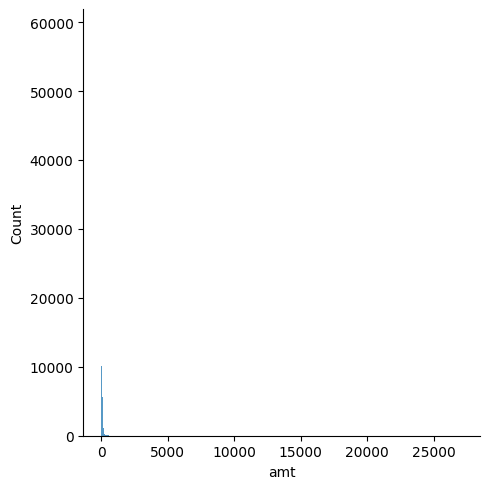

In [105]:
# let's see how the numerical columns are distributed
sns.displot(X_train['amt'])

In [106]:
# applying log transformations
X_train['amt'] = np.log(X_train['amt']+1)
X_test['amt'] = np.log(X_test['amt']+1)


<Axes: xlabel='amt', ylabel='Density'>

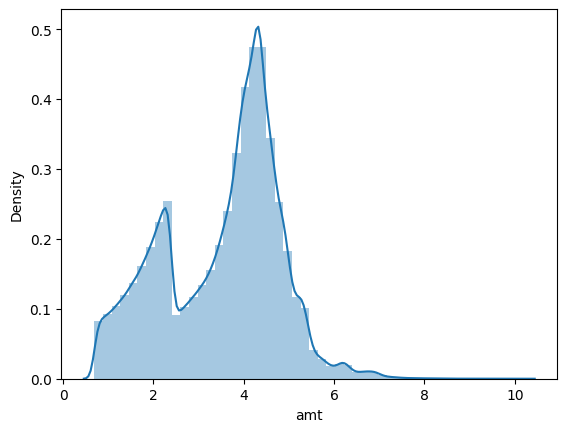

In [107]:
# Visualizing for train data
sns.distplot(X_train['amt'])

<Axes: xlabel='amt', ylabel='Density'>

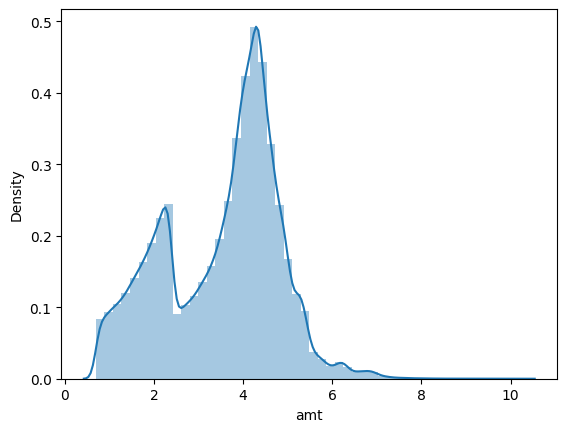

In [108]:
# visualizing for test data
sns.distplot(X_test['amt'])

In [109]:
# saving the train and test datasets to disk
X_train.to_csv('X_train.csv', index = False)
y_train.to_csv('y_train.csv',index = False)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv',index = False)

# 4. Model building and evaluation

## A) Logistic regression

In [110]:
# let's scale the variables using standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [111]:
print(df.dtypes)

category             int64
amt                float64
zip                  int64
job                  int64
trans_num           object
is_fraud             int64
cust_age_groups      int64
trans_hour           int64
gender_M             int64
dtype: object


In [112]:
# scaling the training and testing data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [113]:
# convert them into dataframes
X_train_sc = pd.DataFrame(data = X_train_sc, columns = X_train.columns)
X_test_sc = pd.DataFrame(data = X_test_sc, columns = X_test.columns)

In [114]:
# check 1
X_train_sc.head()

,category,amt,zip,job,cust_age_groups,trans_hour,gender_M
0,1.338581,-1.005021,1.093022,1.698021,-0.218573,1.495558,1.099728
1,-0.761233,-1.886985,-0.557904,-0.084508,1.554004,1.202126,1.099728
2,1.601058,-1.413175,1.019922,0.867697,-0.661718,-0.118316,1.099728
3,-1.286186,0.092526,1.060041,1.210491,-0.218573,-0.705179,-0.909316
4,1.076105,-0.268086,1.005421,0.029756,1.997149,-1.585474,-0.909316


In [115]:
# check 2
X_test_sc.head()

,category,amt,zip,job,cust_age_groups,trans_hour,gender_M
0,-1.023709,0.397421,-1.643512,1.103844,-1.104862,0.175116,1.099728
1,-0.761233,1.179488,-0.586646,1.385697,-0.661718,-0.118316,1.099728
2,1.076105,-1.691797,-1.275631,1.461874,1.554004,-1.145326,-0.909316
3,0.288674,0.469077,1.877900,-0.678685,-1.104862,-0.118316,-0.909316
4,1.338581,-1.263205,-0.552178,-1.166214,-0.661718,0.175116,-0.909316


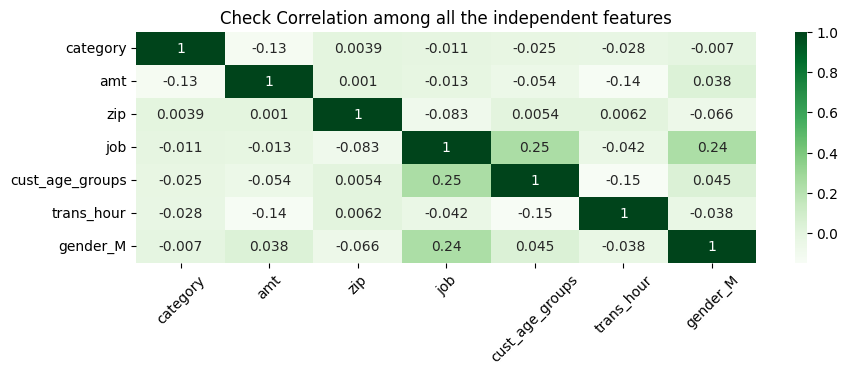

In [116]:
# check correlation among all the independent features in train data
plt.figure(figsize = (10,3))
plt.title("Check Correlation among all the independent features")
sns.heatmap(X_train_sc.corr(),annot = True, cmap = 'Greens')
plt.xticks(rotation = 45)
plt.show()


`Inferences:` `job` feature is correlated to `cust_age_groups` and `gender_M` features of about 25% and 24% respectively. Rest all features have very less correlation among themselves.

`Reference:` https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

In [117]:
# let's build our first logistic regression model with class weight = 'balanced' since we have highly imbalanced data.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, precision_score, recall_score, roc_auc_score, roc_curve

lr = LogisticRegression(class_weight = 'balanced')

In [118]:
# fitting on the training data
lr.fit(X_train_sc,y_train)

# predictions on the training data
y_pred_train = lr.predict(X_train_sc)

# check
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], shape=(1241103,))

In [119]:
# predictions on the test data
y_pred_test = lr.predict(X_test_sc)

# check
y_pred_test

array([0, 1, 0, ..., 0, 0, 0], shape=(611291,))

In [120]:
# let's check the evaluation metrics, import confusion matrix
from sklearn.metrics import confusion_matrix

# for train data
## TN FP
## FN TP
print(confusion_matrix(y_train, y_pred_train))

[[965705 268932]
 [  1457   5009]]


`Inferences:` We got TP = 5009, FN = 1457 on train data

In [121]:
# test data
print(confusion_matrix(y_test, y_pred_test))

[[474756 133350]
 [   673   2512]]


In [122]:
# roc_auc score
print(f'ROC_AUC score on train data is {roc_auc_score(y_train,y_pred_train)} and on test data is {roc_auc_score(y_test,y_pred_test)}')

ROC_AUC score on train data is 0.7784223815160402 and on test data is 0.784704795202683


In [123]:
# accuracy score
print(f'Accuracy on train data is {accuracy_score(y_train,y_pred_train)} and on test data is {accuracy_score(y_test,y_pred_test)}')

Accuracy on train data is 0.7821381464713243 and on test data is 0.7807541743621287


In [124]:
# precision score on train and test data
print(f'Precision score on train data = {precision_score(y_train, y_pred_train)}')

print(f'Precision score on test data = {precision_score(y_test, y_pred_test)}')

Precision score on train data = 0.018284959170040263
Precision score on test data = 0.018489349486979435


In [125]:
# recall score on train and test data
print(f'Recall score on train data = {recall_score(y_train, y_pred_train)}')

print(f'Recall score on test data = {recall_score(y_test, y_pred_test)}')

Recall score on train data = 0.7746674914939684
Recall score on test data = 0.7886970172684459


Let's try to improve the recall score by trying different thresholds or cut-offs.

In [126]:
# let's get predicted probabilites for train data
y_pred_train_proba = lr.predict_proba(X_train_sc)

# check
y_pred_train_proba

array([[0.93071935, 0.06928065],
       [0.93502233, 0.06497767],
       [0.96004899, 0.03995101],
       ...,
       [0.51890276, 0.48109724],
       [0.9528267 , 0.0471733 ],
       [0.9469446 , 0.0530554 ]], shape=(1241103, 2))

In [127]:
# let's get predicted probabilities for test data
y_pred_test_proba = lr.predict_proba(X_test_sc)

# check
y_pred_test_proba

array([[0.62614903, 0.37385097],
       [0.41012433, 0.58987567],
       [0.95722589, 0.04277411],
       ...,
       [0.78930911, 0.21069089],
       [0.5432628 , 0.4567372 ],
       [0.77955946, 0.22044054]], shape=(611291, 2))

In [128]:
y_train_results = pd.DataFrame(y_pred_train_proba, columns = ['pred_not_fraud','pred_fraud'])

# check
y_train_results

,pred_not_fraud,pred_fraud
0,0.930719,0.069281
1,0.935022,0.064978
2,0.960049,0.039951
3,0.688440,0.311560
4,0.776420,0.223580
...,...,...
1241098,0.737145,0.262855
1241099,0.462534,0.537466
1241100,0.518903,0.481097
1241101,0.952827,0.047173


In [129]:
y_train_results['y_train_actual'] = y_train.values

# check
y_train_results

,pred_not_fraud,pred_fraud,y_train_actual
0,0.930719,0.069281,0
1,0.935022,0.064978,0
2,0.960049,0.039951,0
3,0.688440,0.311560,0
4,0.776420,0.223580,0
...,...,...,...
1241098,0.737145,0.262855,0
1241099,0.462534,0.537466,0
1241100,0.518903,0.481097,0
1241101,0.952827,0.047173,0


<Axes: title={'center': 'Range of probabilities of getting fraud'}, ylabel='Frequency'>

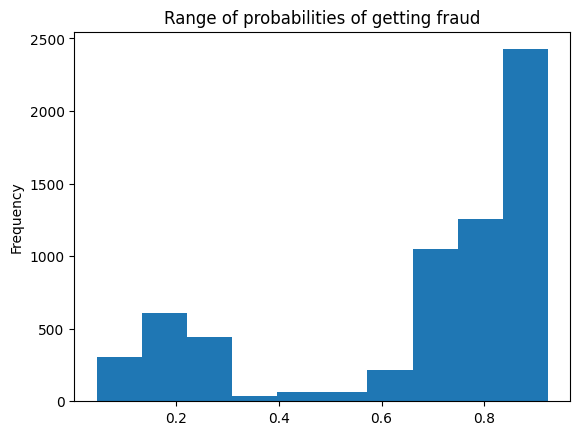

In [130]:
# check the range of probabilities of getting fraud.
y_train_results[y_train_results['y_train_actual'] == 1]['pred_fraud'].plot(kind = 'hist', title = 'Range of probabilities of getting fraud')

In [131]:
y_test_results = pd.DataFrame(y_pred_test_proba, columns = ['pred_not_fraud','pred_fraud'])

# check
y_test_results

,pred_not_fraud,pred_fraud
0,0.626149,0.373851
1,0.410124,0.589876
2,0.957226,0.042774
3,0.646996,0.353004
4,0.936309,0.063691
...,...,...
611286,0.713057,0.286943
611287,0.509221,0.490779
611288,0.789309,0.210691
611289,0.543263,0.456737


In [132]:
y_test_results['y_test_actual'] = y_test.values

# check
y_test_results

,pred_not_fraud,pred_fraud,y_test_actual
0,0.626149,0.373851,0
1,0.410124,0.589876,0
2,0.957226,0.042774,0
3,0.646996,0.353004,0
4,0.936309,0.063691,0
...,...,...,...
611286,0.713057,0.286943,0
611287,0.509221,0.490779,0
611288,0.789309,0.210691,0
611289,0.543263,0.456737,0


#### Let's find an optimal threshold point to classify whether it is a fraudulent transaction or not fraudulent transaction.

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_results[i]= y_train_results.pred_fraud.map(lambda x: 1 if x > i else 0)
y_train_results.head()

,pred_not_fraud,pred_fraud,y_train_actual,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.930719,0.069281,0,0,0,0,0,0,0,0,0,0,0
1,0.935022,0.064978,0,0,0,0,0,0,0,0,0,0,0
2,0.960049,0.039951,0,0,0,0,0,0,0,0,0,0,0
3,0.688440,0.311560,0,1,1,1,1,0,0,0,0,0,0
4,0.776420,0.223580,0,1,1,1,0,0,0,0,0,0,0


In [134]:
from sklearn.metrics import confusion_matrix

# Create a dataframe to store the probability threshold, precision, and recall
cutoff_df = pd.DataFrame(columns=['prob', 'precision_score', 'recall_score'])

for i in numbers:
    cm1 = confusion_matrix(y_train_results['y_train_actual'], y_train_results[i])
    
    TP = cm1[1,1]  # True Positives
    FP = cm1[0,1]  # False Positives
    FN = cm1[1,0]  # False Negatives

    # Compute precision and recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # Store results in DataFrame
    cutoff_df.loc[i] = [i, precision, recall]

print(cutoff_df)

      prob  precision_score  recall_score
0.10  0.10         0.006516      0.987473
0.15  0.15         0.006714      0.933962
0.20  0.20         0.006811      0.885091
0.30  0.30         0.007149      0.792607
0.40  0.40         0.009588      0.785184
0.50  0.50         0.018285      0.774667
0.60  0.60         0.043093      0.760749
0.70  0.70         0.110788      0.671976
0.80  0.80         0.186002      0.476338
0.90  0.90         0.065550      0.020569


In [135]:
from sklearn.metrics import confusion_matrix

# Create a DataFrame to store probability threshold, precision, recall, and F1-score
cutoff_df = pd.DataFrame(columns=['prob', 'precision_score', 'recall_score', 'F1_score'])

for i in numbers:
    cm1 = confusion_matrix(y_train_results['y_train_actual'], y_train_results[i])
    
    TP = cm1[1,1]  # True Positives
    FP = cm1[0,1]  # False Positives
    FN = cm1[1,0]  # False Negatives

    # Compute precision, recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Store results in DataFrame
    cutoff_df.loc[i] = [i, precision, recall, f1_score]

print(cutoff_df)

      prob  precision_score  recall_score  F1_score
0.10  0.10         0.006516      0.987473  0.012947
0.15  0.15         0.006714      0.933962  0.013333
0.20  0.20         0.006811      0.885091  0.013518
0.30  0.30         0.007149      0.792607  0.014170
0.40  0.40         0.009588      0.785184  0.018944
0.50  0.50         0.018285      0.774667  0.035727
0.60  0.60         0.043093      0.760749  0.081566
0.70  0.70         0.110788      0.671976  0.190216
0.80  0.80         0.186002      0.476338  0.267535
0.90  0.90         0.065550      0.020569  0.031313


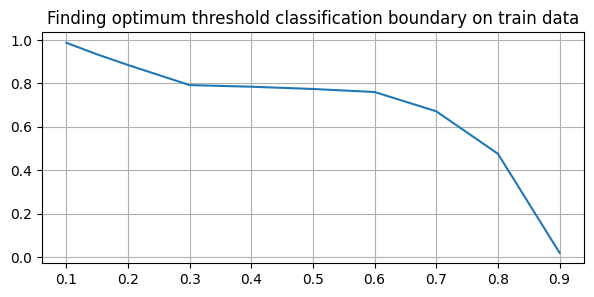

In [136]:
plt.figure(figsize = (7,3))
plt.title('Finding optimum threshold classification boundary on train data')
plt.plot(cutoff_df.prob, cutoff_df.recall_score)
plt.grid()
plt.show()

#### let's consider 0.15 as an optimal threshold point

In [137]:
# applying on test data
y_test_results['pred_final'] = y_test_results['pred_fraud'].apply(lambda x: 1 if x>0.15 else 0)

# check
y_test_results.head()

,pred_not_fraud,pred_fraud,y_test_actual,pred_final
0,0.626149,0.373851,0,1
1,0.410124,0.589876,0,1
2,0.957226,0.042774,0,0
3,0.646996,0.353004,0,1
4,0.936309,0.063691,0,0


In [138]:
y_test_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611291 entries, 0 to 611290
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pred_not_fraud  611291 non-null  float64
 1   pred_fraud      611291 non-null  float64
 2   y_test_actual   611291 non-null  int64  
 3   pred_final      611291 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 18.7 MB


In [139]:
# confusion matrix
## TN FP
## FN TP
cm = confusion_matrix(y_test_results['y_test_actual'],y_test_results['pred_final'] )
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print(cm)

[[168384 439722]
 [   210   2975]]


In [140]:
# computing recall score
print(f'Recall score of the model on test data = {TP/(TP+FN)}')

Recall score of the model on test data = 0.9340659340659341


In [141]:
np.array(y_test_results['y_test_actual'])

array([0, 0, 0, ..., 0, 0, 0], shape=(611291,))

#### We have a matching recall scores between both training and testing data. Based on these predictions, let's do cost benefit analyis.

In [142]:
arr1 = y_train_results[['y_train_actual',0.15]].values
arr2 = y_test_results[['y_test_actual','pred_final']].values

arr_f = np.concatenate((arr1, arr2), axis=0)

arr_f

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], shape=(1852394, 2))

In [143]:
arr_f.shape

(1852394, 2)

In [144]:
lr_results = pd.DataFrame(arr_f, columns = ['is_f_actual','is_f_pred'])

# check
lr_results

,is_f_actual,is_f_pred
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
1852389,0,1
1852390,0,1
1852391,0,1
1852392,0,1


In [145]:
txn_train

,txn_num,amt
0,1a3b2c30799a30f89d00defe95d27efd,8.37
1,17afa7441d6f1986334db9ef8d6eaedb,2.01
2,d6aecc9b07468dfe6dc3b78328f5278a,4.54
3,e24f550edd520f1e60d82086d94d497d,37.5
4,055f41732062c4383412aa029ed6861d,23.2
...,...,...
1241098,444d47d2786e8b0b345a486baa47f510,19.13
1241099,a041ad4ddb4532d9b6147b94259dd9ea,74.15
1241100,93c58684304726579f25df4d844e0c7c,116.07
1241101,8f00350564ae8d24c6a08d715325d0be,2.52


In [146]:
txn_test

,txn_num,amt
0,cc1e7d79b3cbfe19dbf78b20f44849aa,56.01
1,8bf0eaaff6f87de82da4219e49c4593a,155.05
2,3654dfe66398efbdf060ddc88f6f2f97,2.87
3,728a99077629ec72f8add5c0562957a8,61.52
4,da80eb4642fc047f226f6faa5efa0a1c,5.72
...,...,...
611286,338aa875143b08d159cd44fdb76f4ffc,35.9
611287,e878b9d59e35bdce751bef5a29040346,86.18
611288,5a25fad9d2744927c5a1c59602e30bc2,28.85
611289,c7fca8fb5ffb1fc602e6ee409bfef0d4,57.78


In [147]:
# Adding transaction num and transaction amt columns
lr_results['txn_amt'] = pd.concat([txn_train,txn_test])['amt'].values
lr_results['txn_num'] = pd.concat([txn_train,txn_test])['txn_num'].values

# check
lr_results

,is_f_actual,is_f_pred,txn_amt,txn_num
0,0,0,8.37,1a3b2c30799a30f89d00defe95d27efd
1,0,0,2.01,17afa7441d6f1986334db9ef8d6eaedb
2,0,0,4.54,d6aecc9b07468dfe6dc3b78328f5278a
3,0,1,37.5,e24f550edd520f1e60d82086d94d497d
4,0,1,23.2,055f41732062c4383412aa029ed6861d
...,...,...,...,...
1852389,0,1,35.9,338aa875143b08d159cd44fdb76f4ffc
1852390,0,1,86.18,e878b9d59e35bdce751bef5a29040346
1852391,0,1,28.85,5a25fad9d2744927c5a1c59602e30bc2
1852392,0,1,57.78,c7fca8fb5ffb1fc602e6ee409bfef0d4


In [148]:
# saving the model results into a dataframe
model_results = pd.DataFrame(columns = ['model','train_recall_score','test_recall_score','Cost saved by the model per month'])

model_results.loc[len(model_results)] = ['Logistic Regression model', 0.93, 0.93, '$115,538.03']

# check
model_results

,model,train_recall_score,test_recall_score,Cost saved by the model per month
0,Logistic Regression model,0.93,0.93,"$115,538.03"


In [149]:
# save this data frame to disk as .csv file
model_results.to_csv('model_results.csv', index = False)

### Our Logistic regression model is successful in saving the costs per month upto $115,426.53

## B) Random Forest Classifier

In [150]:
# instantiating random forest classifier with class weights
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestClassifier(class_weight = 'balanced')

In [151]:
# fitting on the training data
rf.fit(X_train,y_train)

# predictions on the training data
y_pred_train_rf = rf.predict(X_train)

# predictions on the test data
y_pred_test_rf = rf.predict(X_test)

KeyboardInterrupt: 

In [ ]:
# check predictions on train data
y_pred_train_rf

array([0, 0, 0, ..., 0, 0, 0], shape=(1241103,))

In [ ]:
# check predictions on test data
y_pred_test_rf

array([0, 0, 0, ..., 0, 0, 0], shape=(611291,))

In [ ]:
# check confusion matrix on both train and test data

## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_pred_train_rf)
cm_test = confusion_matrix(y_test,y_pred_test_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)

Training data: [[1234636       1]
 [      0    6466]]

Testing data: [[607958    148]
 [   746   2439]]


In [ ]:
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')

Recall score of the model on train data: 1.0


In [ ]:
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

Recall score of the model on test data: 0.7657770800627943


In [ ]:
# get the parameters of the model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

`Inferences:` Model overfit

In [ ]:
# importing randomized search cv to do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(class_weight = 'balanced')
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['gini','entropy','log_loss'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}


#randomized search cv
rcv = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 10, scoring = 'recall', cv = 10, verbose=5, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.983, test=0.841) total time= 2.9min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.984, test=0.873) total time= 3.8min
[CV 1/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.981, test=0.866) total time= 3.8min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.978, test=0.852) total time= 4.4min
[CV 10/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.749, test=0.782) total time= 5.2min
[CV 1/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.796, test=0.827) total time= 5.5min
[CV 6/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.748, test=0.735) total time= 5.6min
[CV 8/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.747, test=0.740) total time= 5.6min
[CV 9/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train

/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.779, test=0.785) total time= 6.1min
[CV 2/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.754, test=0.787) total time= 6.1min
[CV 5/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.983, test=0.844) total time= 3.1min
[CV 7/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.749, test=0.720) total time= 6.5min
[CV 5/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.748, test=0.734) total time= 6.7min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 7/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.978, test=0.833) total time= 2.8min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 6/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.980, test=0.854) total time= 3.2min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.981, test=0.879) total time= 1.6min
[CV 2/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.978, test=0.887) total time= 1.5min
[CV 8/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.981, test=0.842) total time= 2.6min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.982, test=0.862) total time= 1.4min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.980, test=0.878) total time= 1.8min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.979, test=0.853) total time= 1.8min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 7/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.981, test=0.867) total time= 1.9min
[CV 6/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.977, test=0.861) total time= 1.9min
[CV 8/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.980, test=0.872) total time= 1.5min
[CV 9/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.979, test=0.864) total time= 1.5min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 10/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.980, test=0.873) total time= 1.6min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 9/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.983, test=0.847) total time= 3.3min
[CV 10/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.980, test=0.856) total time= 3.1min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.754, test=0.756) total time= 2.4min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.780, test=0.777) total time= 2.5min
[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.800, test=0.832) total time= 2.7min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.854, test=0.851) total time= 2.6min
[CV 2/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.792, test=0.822) total time= 3.0min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 6/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.749, test=0.735) total time= 2.7min
[CV 6/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.971, test=0.944) total time=10.6min
[CV 3/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.970, test=0.944) total time=10.8min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 8/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.774, test=0.756) total time= 3.1min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 10/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.839, test=0.866) total time= 3.0min
[CV 10/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.969, test=0.952) total time=11.3min
[CV 8/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.973, test=0.927) total time=11.4min
[CV 7/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.752, test=0.720) total time= 3.3min
[CV 9/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.820, test=0.804) total time= 3.2min
[CV 5/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.97

KeyboardInterrupt: 

In [ ]:
# best estimator
rcv.best_estimator_

In [ ]:
# best score
rcv.best_score_

In [ ]:
# let's re build random forest model
rf = rcv.best_estimator_

# fitting on train data
rf.fit(X_train,y_train)

In [ ]:
# predictions on train data
y_train_pred_rf = rf.predict(X_train)

# predictions on test data
y_test_pred_rf = rf.predict(X_test)

In [ ]:
# check confusion matrix on both train and test data
## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_train_pred_rf)
cm_test = confusion_matrix(y_test,y_test_pred_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)

In [ ]:
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

In [ ]:
# feature importances
feature_imp_rf = pd.DataFrame(index = X_train.columns, data = rf.feature_importances_*100, columns = ['feature_importance_%'])

# check
feature_imp_rf

In [ ]:
plt.title('Feature importances by Random Forest Classifier')
plt.pie(x = feature_imp_rf['feature_importance_%'], labels = feature_imp_rf.index, rotatelabels = True)
plt.show()

`Inferences:` As per the random forest model, the top 3 significant features are `Transaction_amount`, `Transaction_hour` and `Merchant category`. 

In [ ]:
# let's drop the remaining features which are redundant and re train the model
X_train_final = X_train[['amt','trans_hour','category']]
X_test_final = X_test[['amt','trans_hour','category']]


In [ ]:
# initializing random forest model
rf = rcv.best_estimator_

# fitting
rf.fit(X_train_final,y_train)

In [ ]:
# predictions on train data
y_train_pred_rf = rf.predict(X_train_final)

# predictions on test data
y_test_pred_rf = rf.predict(X_test_final)

In [ ]:
# check confusion matrix on both train and test data
## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_train_pred_rf)
cm_test = confusion_matrix(y_test,y_test_pred_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)

In [ ]:
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

In [ ]:
# feature importances
feature_imp_rf = pd.DataFrame(index = X_train_final.columns, data = rf.feature_importances_*100, columns = ['feature_importance_%'])

# check
feature_imp_rf

In [ ]:
plt.title('Feature importances by Random Forest Classifier')
plt.pie(x = feature_imp_rf['feature_importance_%'], labels = feature_imp_rf.index, rotatelabels = True)
plt.show()

#### Let's perform cost benefit analysis using the Random forest classifier model.

In [ ]:
# creating a dataframe
rf_results = pd.DataFrame()

In [ ]:
rf_results['txn_num'] = pd.concat([txn_train,txn_test])['txn_num'].values
rf_results['amt'] = pd.concat([txn_train,txn_test])['amt'].values
rf_results['fraud_act'] = np.concatenate([y_train,y_test],axis = 0)
rf_results['fraud_pred'] = np.concatenate([y_train_pred_rf,y_test_pred_rf],axis = 0)

# check
rf_results

#### Average number of transactions per month detected as fraudulent by the model (TF)

In [ ]:
f_txns = round(len(rf_results[rf_results['fraud_pred'] == 1]['txn_num'].unique())/24)

print(f_txns)

In [ ]:
print(f'Total cost of providing customer support per month for fraudulent transactions detected by the model = {f_txns*1.5}')

#### Average number of transactions per month that are fraudulent but not detected by the model

In [ ]:
f_txns_tn = round(len(rf_results[(rf_results['fraud_act'] == 1) & (rf_results['fraud_pred'] == 0)]['txn_num'].unique())/24)

print(f_txns_tn)

In [ ]:
print(f'Cost incurred due to fraudulent transactions left undetected by the model = {f_txns_tn*530.66}')

In [ ]:
print(f'Cost incurred per month after the model is built and deployed = {2115+7429.24}')

#### Final savings = Cost incurred before - Cost incurred after

In [ ]:
print(f'Final savings = $ {213325.32 - 9544.24}')

In [ ]:
model_results

In [ ]:
# saving the results
model_results.loc[len(model_results)] = ['Random Forest Clasifier model', 0.97,0.95,'$203,781.08']

# check
model_results